# TP6 - Analyse de données sous `Python` - *application*

#### Analyse de Données Massives - Master 1ère année

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [3]:
# Importation des données
pen_tes = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes", 
                          header=None)
pen_tra = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra", 
                          header=None)

# Rassemblement des deux jeux de données en un seul
pen = pen_tes.copy().append(pen_tra, ignore_index = True)

# Création des noms de variables : x1, y1, x2, y2, ..., chiffre
a = [c + n for c, n in zip(["x", "y"] * 8, [str(x) for x in range(1, 9) for i in range(2)])]
a.append("chiffre")
pen.columns = a

# Ajout du chiffre en chaîne de caractère
pen = pen.assign(chiffre_str = [str(c) for c in pen.chiffre])

# Vue des premières lignes du DataFrame
pen.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,chiffre,chiffre_str
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9,9


In [4]:
# Définition de trois vecteurs de noms de variables :
#   xN : x1, x2, ..., x8
#   yN : y1, y2, ..., y8
#   xyN : x1, y1, x2, y2, ..., x8, y8
xN = ["x" + str(i + 1) for i in range(8)]
yN = ["y" + str(i + 1) for i in range(8)]
xyN = [a + b for a,b in zip(["x", "y"] * 8, [str(i + 1) for i in range(8) for j in range(2)])]

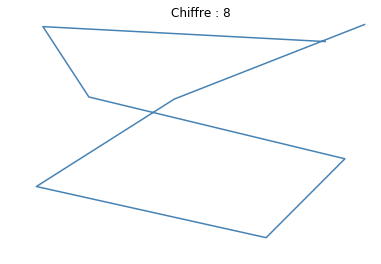

In [5]:
# Fonction de dessin d'un tracé de chiffre
def dessin(p, x, y, chiffre = None, couleur = "steelblue"):
    p.plot(x, y, couleur)
    if (chiffre != None):
        p.set_title("Chiffre : " + str(chiffre))
    p.axis("off")
    p.set_xlim([-1, 101])
    p.set_ylim([-1, 101])

# Application sur le premier exemple du jeu de données (un 8)
fig, ax = plt.subplots()
dessin(ax, pen.loc[0, xN], pen.loc[0, yN], pen.loc[0, "chiffre"])

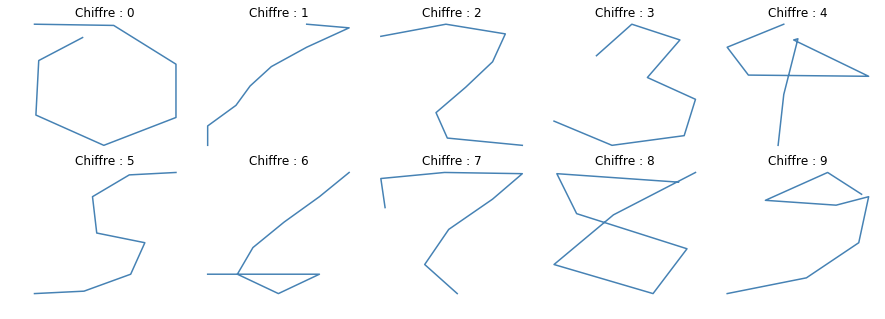

In [6]:
# Création de la liste de 10 DataFrame (un par chiffre)
sub = [pen.query("chiffre == " + str(i)).reset_index(drop = True) for i in range(10)]

# Premier exemple de chaque chiffre
subxyc = [[s.loc[0, xN], s.loc[0, yN], s.loc[0, "chiffre"]] for s in sub]

# Dessin du premier exemple de chaque chiffre
fig = plt.figure(figsize = (15, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    dessin(ax, subxyc[i][0], subxyc[i][1], subxyc[i][2])

In [7]:
# Calcul du tracé moyen pour chaque chiffre
chmoy = [[s[0:15:2], s[1:16:2], int(s[16])] for s in [ss.mean() for ss in sub]]

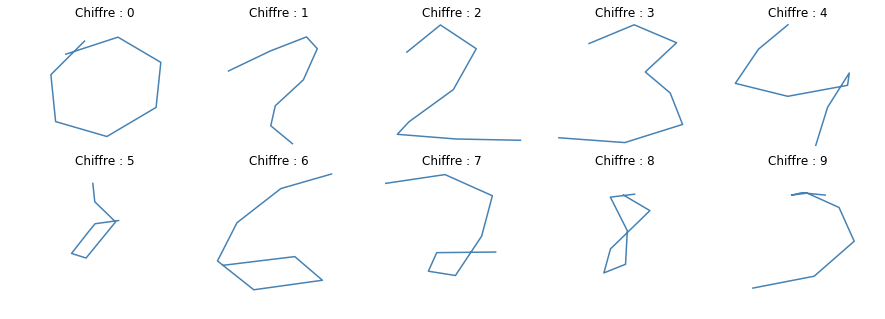

In [8]:
# Dessin du tracé moyen pour chaque chiffre
fig = plt.figure(figsize = (15, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    dessin(ax, chmoy[i][0], chmoy[i][1], chmoy[i][2])

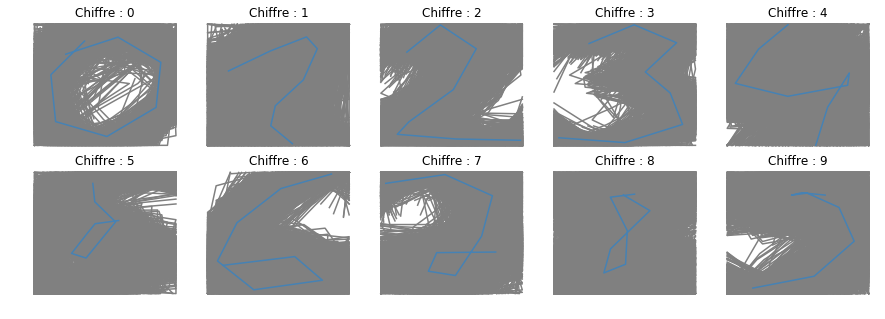

In [9]:
# Dessin du tracé moyen pour chaque chiffre, avec chaque tracé en plus
fig = plt.figure(figsize = (15, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    for j in range(len(sub[i])):
        dessin(ax, sub[i].loc[j, xN], sub[i].loc[j, yN], couleur = ".5")
    dessin(ax, chmoy[i][0], chmoy[i][1], chmoy[i][2])

## ACP

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [17]:
pen[xyN].head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0


In [18]:
pca = PCA(whiten=True)
pca.fit(scale(pen[xyN]))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [19]:
pca.explained_variance_ratio_


array([0.29478665, 0.20181951, 0.16105039, 0.07685886, 0.0664437 ,
       0.04983371, 0.03791573, 0.03426572, 0.02567651, 0.01863943,
       0.01315704, 0.00701856, 0.00503007, 0.00362513, 0.00214153,
       0.00173746])

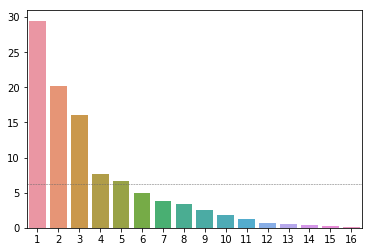

In [20]:
seaborn.barplot(x = [x + 1 for x in range(len(pca.explained_variance_ratio_))], 
                y = pca.explained_variance_ratio_ * 100)
plt.axhline(y = 100/16, linewidth = .5, color = "dimgray", linestyle = "--")

In [21]:
pen_pca = pca.transform(pen[xyN])
pen_pca.shape

(10992, 16)

In [22]:
pen_pca_df = pandas.DataFrame().assign(Dim1 = pen_pca[:,0], Dim2 = pen_pca[:,1], chiffre = pen.chiffre_str)

In [23]:
pen_pca_df.shape

(10992, 3)

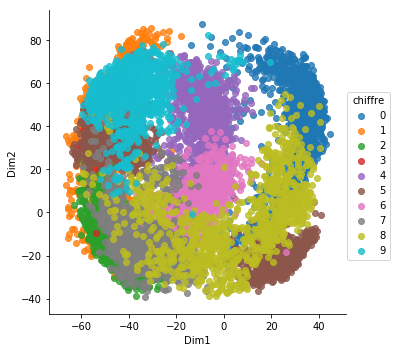

In [24]:
seaborn.lmplot("Dim1", "Dim2", hue = "chiffre", data = pen_pca_df, fit_reg = False)

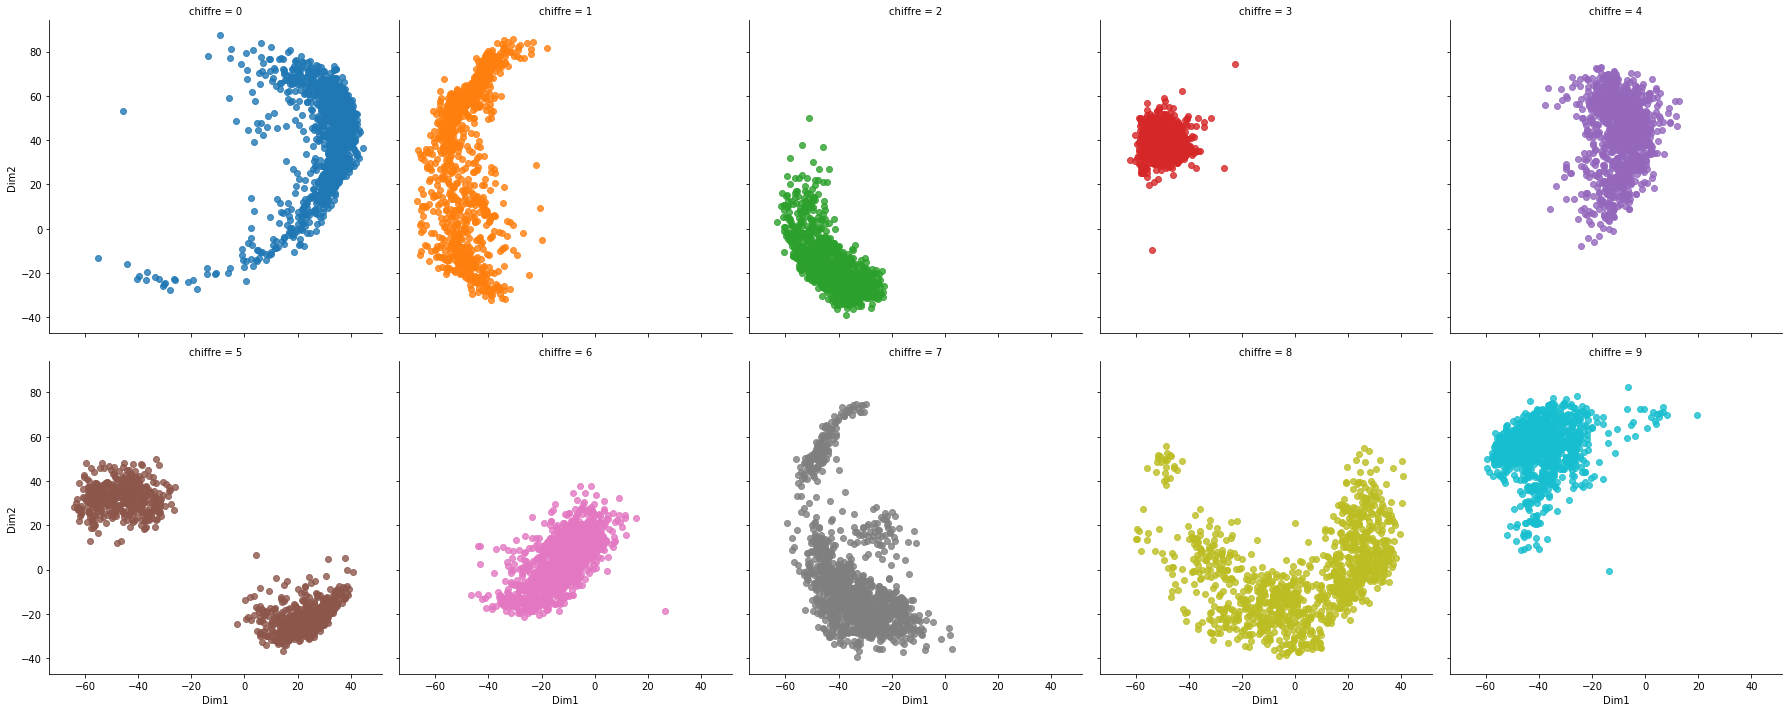

In [25]:
seaborn.lmplot("Dim1", "Dim2", hue = "chiffre", data = pen_pca_df, fit_reg = False, col = "chiffre", col_wrap = 5)

## DBSCAN

Mais **par chiffre**

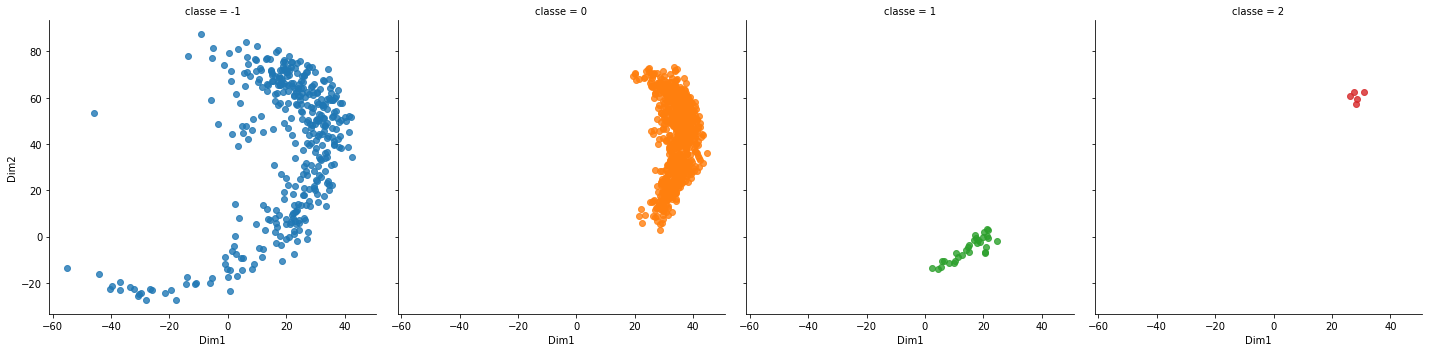

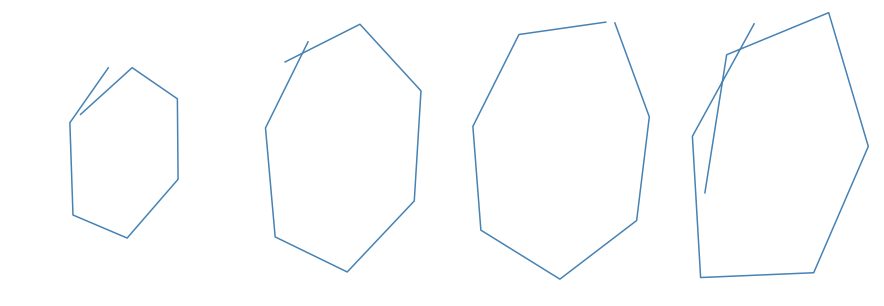

In [41]:
from sklearn.cluster import DBSCAN

# récupération des tracés et des coordonnées de l'ACP pour 0
pen_0 = pen.query("chiffre == 0")[xyN]
pca_0 = pen_pca_df.query("chiffre == '0'")
# application de DBSCAN dessus
db_0 = DBSCAN(eps = 20).fit(pen_0)
# affichage ACP
pca_0_cl = pca_0.assign(classe = db_0.labels_)
seaborn.lmplot("Dim1", "Dim2", hue = "classe", data = pca_0_cl, 
               fit_reg = False, col = "classe")
# calcul des moyennes par classes et affichages
pen_0_cl = pen_0.assign(classe = db_0.labels_)
pen_0_tr = pen_0_cl.groupby("classe").mean()
fig = plt.figure(figsize = (15, 5))
for i, l in enumerate(pen_0_tr.index):
    ax = fig.add_subplot(1, len(pen_0_tr.index), i + 1)
    dessin(ax, pen_0_tr.loc[l, xN], pen_0_tr.loc[l, yN])

In [39]:
pen_ch = [pen.query("chiffre == " + str(c)) for c in range(10)]
pca_ch = [pen_pca_df.query("chiffre == '" + str(c) + "'") for c in range(10)]

In [40]:
pen_ch_db = [DBSCAN(eps = 40, min_samples = 5).fit(p[xyN]) for p in pen_ch]
pen_ch_db_labels = [db.labels_ for db in pen_ch_db]

pandas.DataFrame().assign(chiffre = range(10),
                          NbClasse = [max(lab) + 1 for lab in pen_ch_db_labels],
                          Outliers = [sum(lab == -1) for lab in pen_ch_db_labels])

,chiffre,NbClasse,Outliers
0,0,1,38
1,1,4,41
2,2,1,6
3,3,1,8
4,4,2,18
5,5,2,9
6,6,1,13
7,7,3,16
8,8,7,171
9,9,4,83


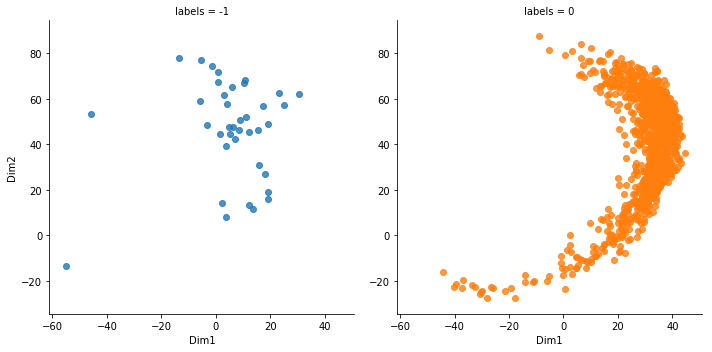

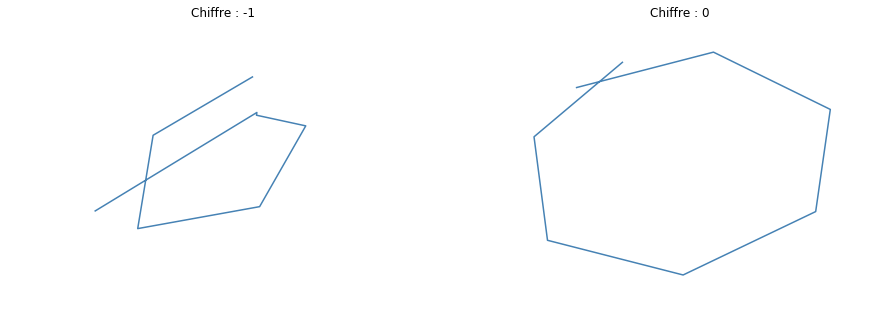

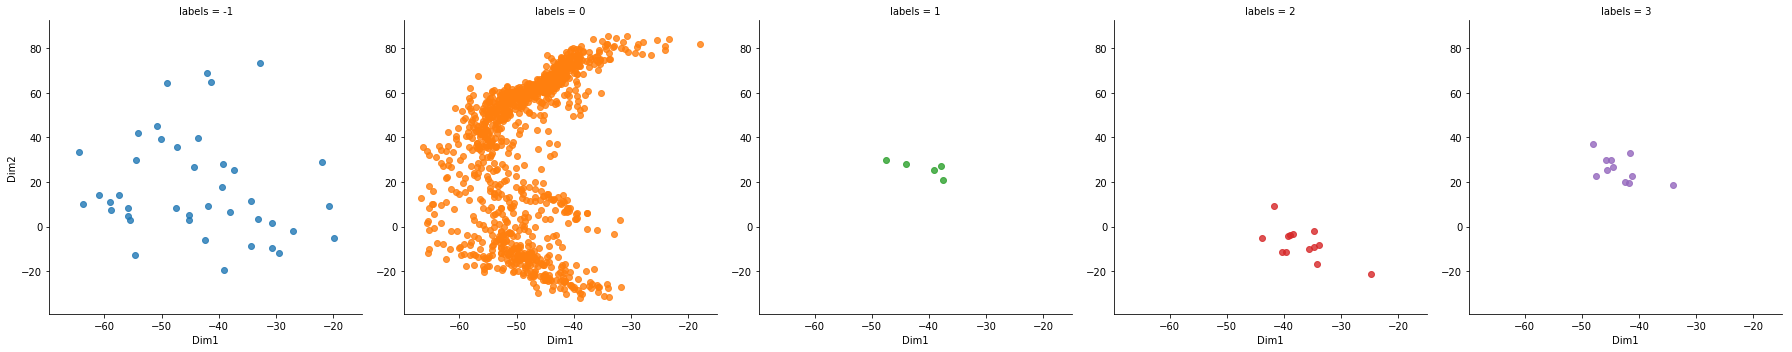

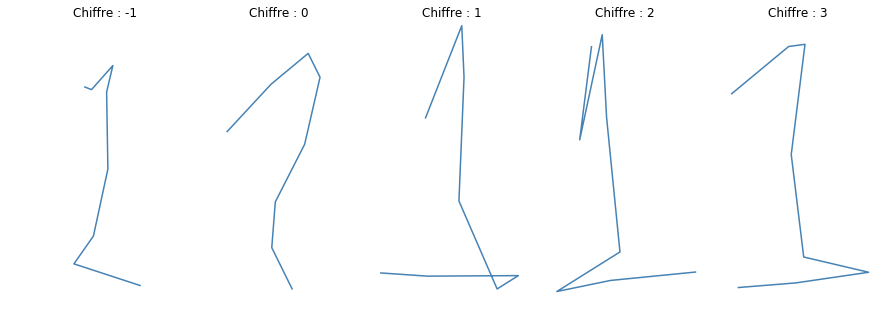

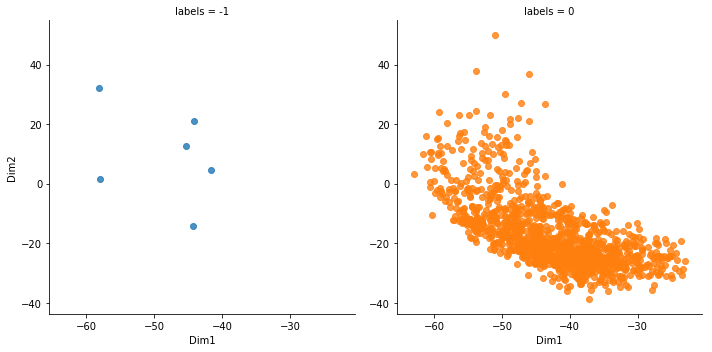

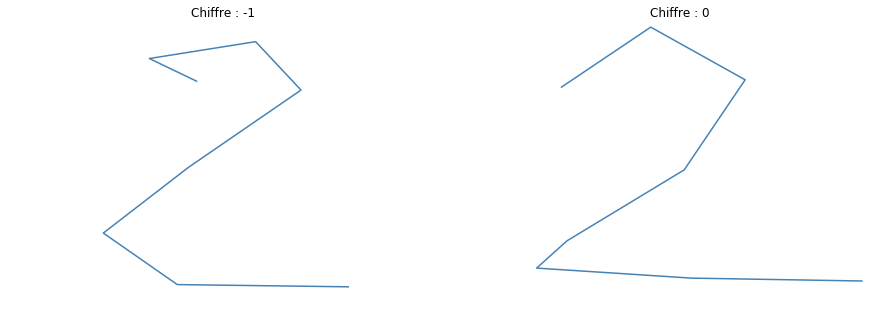

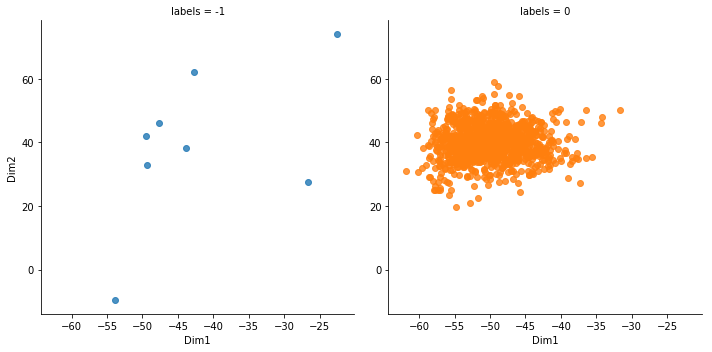

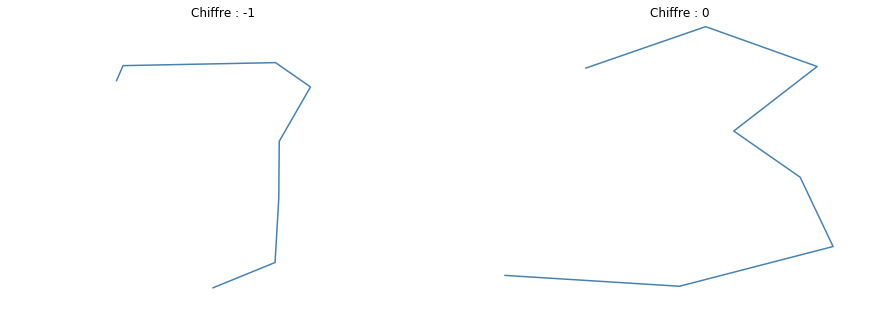

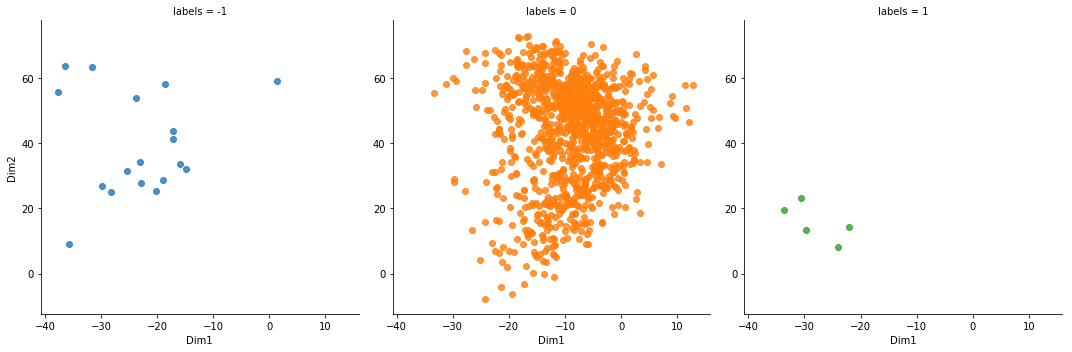

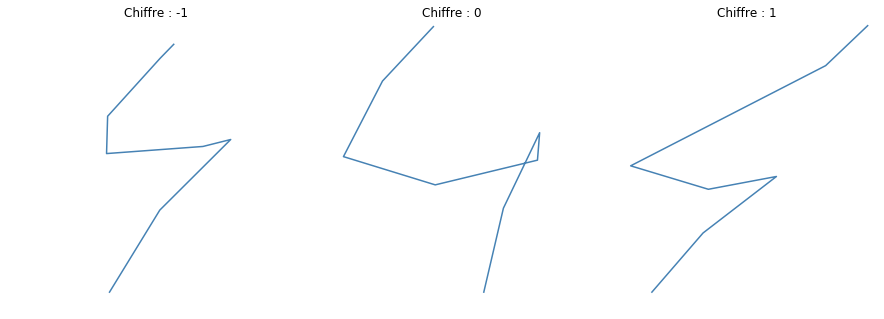

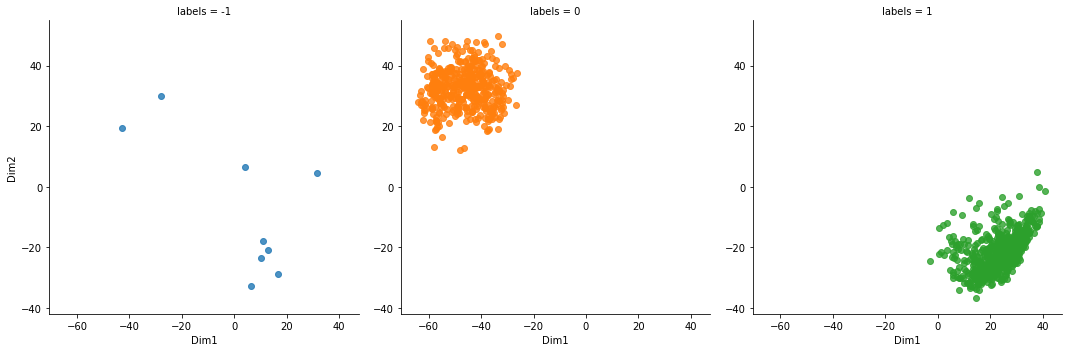

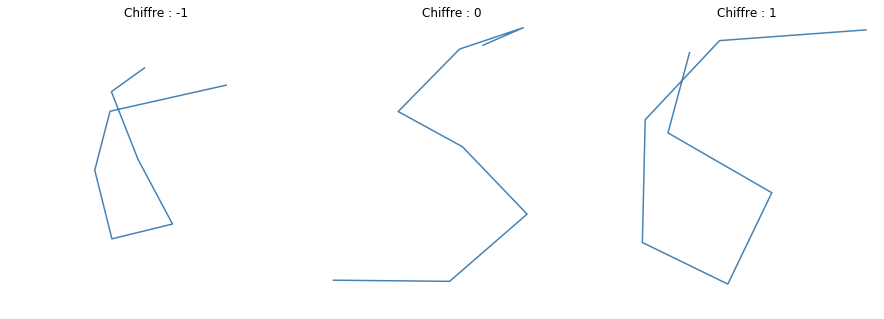

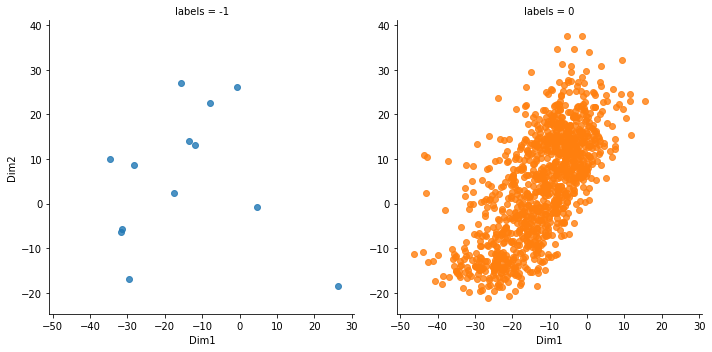

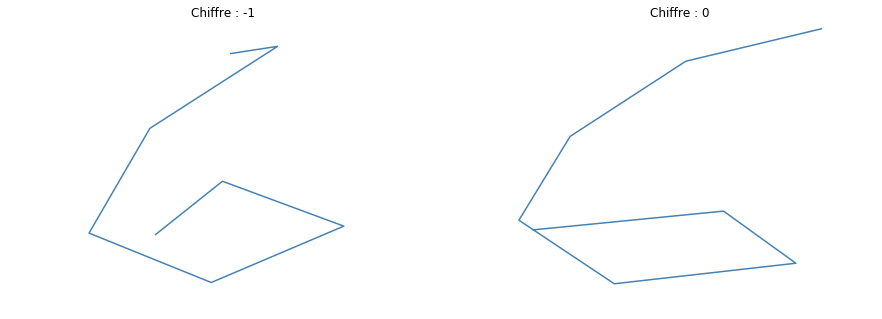

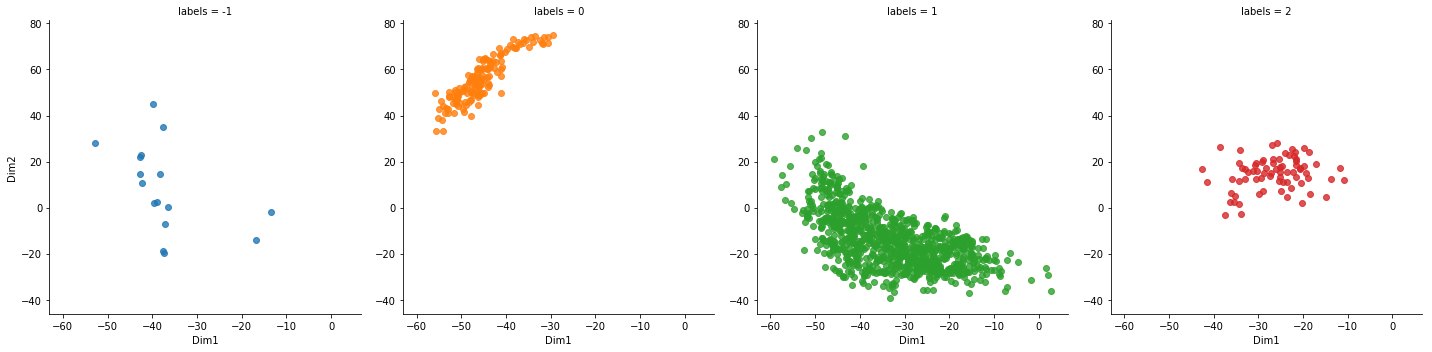

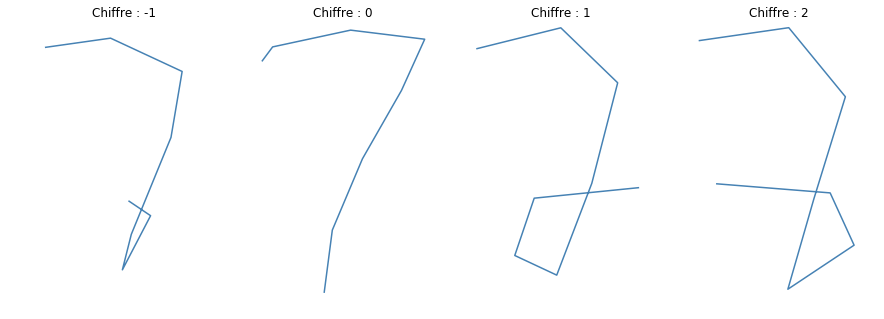

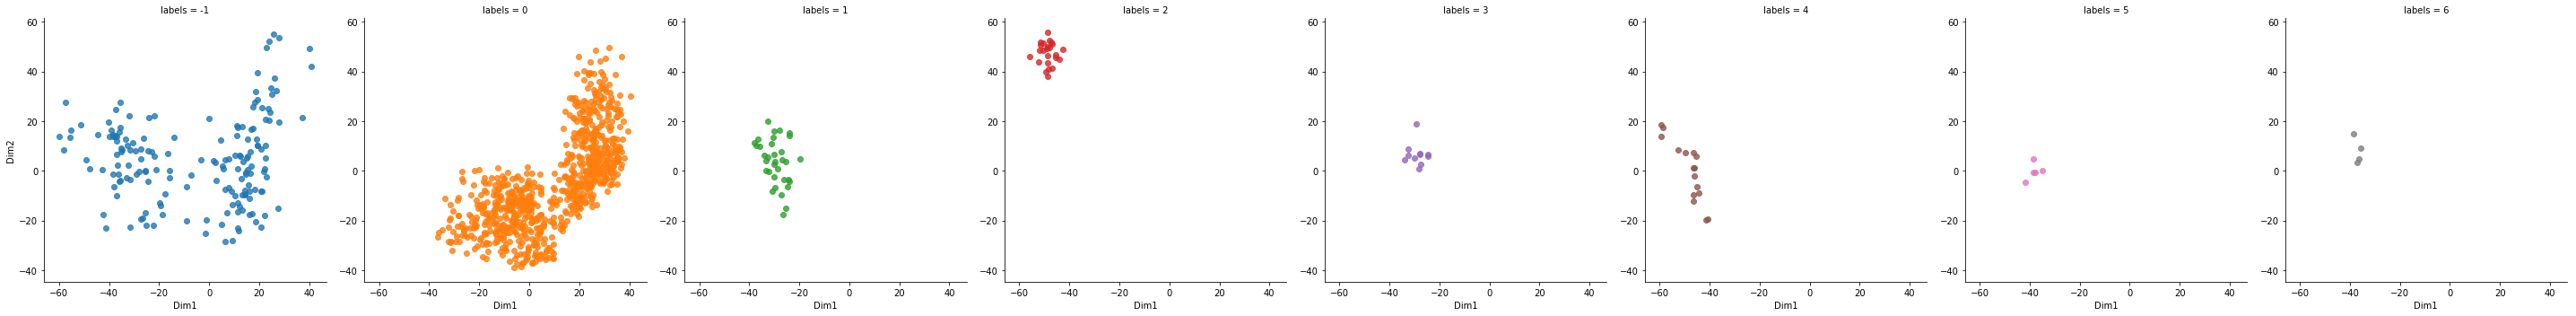

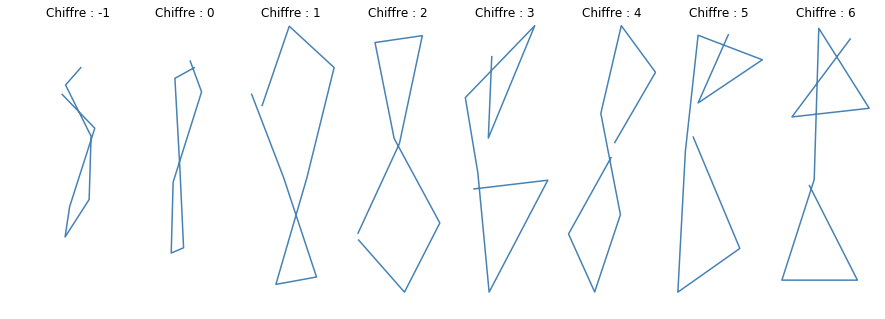

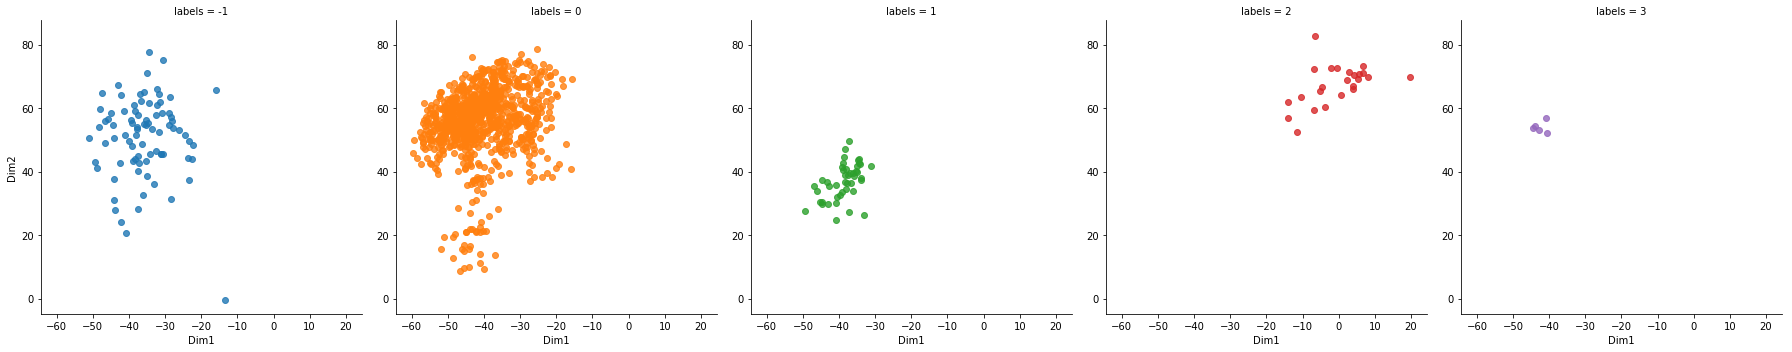

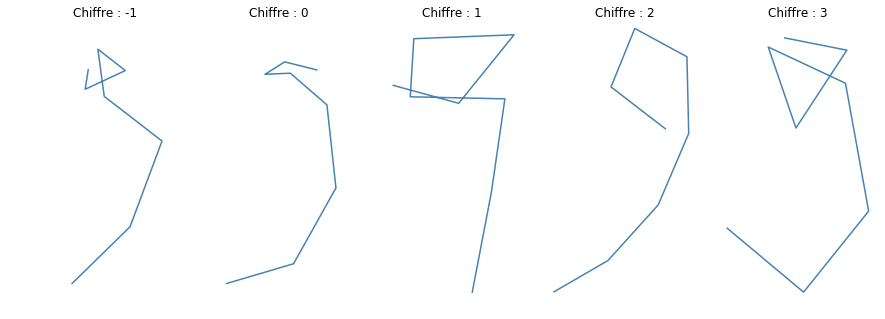

In [45]:
for c in range(10):
    temp = pca_ch[c].assign(labels = pen_ch_db[c].labels_)
    seaborn.lmplot("Dim1", "Dim2", hue = "labels", col = "labels", data = temp, fit_reg = False)
    temp2 = pen_ch[c].assign(labels = pen_ch_db[c].labels_)
    temp3 = temp2.groupby("labels").mean()
    fig = plt.figure(figsize = (15, 5))
    for i, l in enumerate(temp3.index):
        ax = fig.add_subplot(1, len(temp3.index), i + 1)
        dessin(ax, temp3.loc[l, xN], temp3.loc[l, yN], l)
    